7
           b         m         MSE    dMSE_db     dMSE_dm
0   0.000000  0.500000  209.678571 -26.428571 -104.142857
1   0.264286  1.541429  111.067852 -18.758776  -73.765714
2   0.451873  2.279086   61.581643 -13.325380  -52.246517
3   0.585127  2.801551   36.747741  -9.476254  -37.002303
4   0.679890  3.171574   24.285184  -6.749428  -26.203300
..       ...       ...         ...        ...         ...
95  1.008686  4.045610   11.718957  -0.098447    0.024855
96  1.009671  4.045361   11.718854  -0.098183    0.024789
97  1.010653  4.045113   11.718752  -0.097919    0.024722
98  1.011632  4.044866   11.718650  -0.097656    0.024655
99  1.012608  4.044619   11.718549  -0.097393    0.024589

[100 rows x 5 columns]


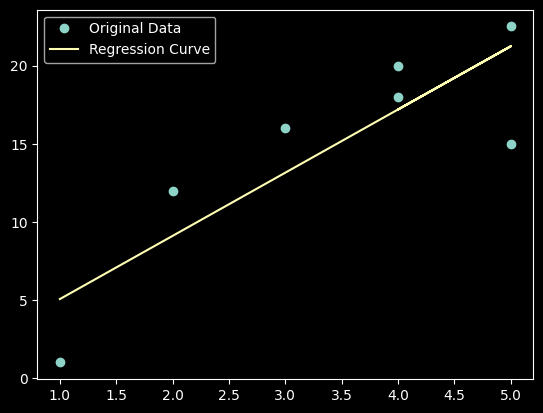

In [1]:
### IMPORT
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns #for colors 
colors=sns.light_palette('seagreen', 3) 
plt.style.use('dark_background') # for customizing theme

#data 
[xs, ys] = [[1,2,3,4,5,4,5] , [1, 12, 16, 18, 22.5, 20, 15]] 

#Hyperparameter
Learning_rate = 0.01 
epochs = range(0,100) 

#Starting Values: 
prev_db = 0;  dMSE_db = 0; 
b = 0; m = 0.5 #Gewichte sind ungleich 0

#Variables
y_regression = [] 
prev_MSE = 0
liste=[]
column_names = ['b', 'm', 'MSE', 'dMSE_db', 'dMSE_dm']

#Funktionen
def linear_function (X, M, B): 
    Y=M*float(X)+B 
    return Y

for k in epochs:
    dMSE_db = 0
    dMSE_dm = 0
    MSE = 0
    for i in range(0,len(xs)): 
        dMSE_db = dMSE_db - 2/len(xs) * (ys[i] - m*xs[i] - b)
        #dMSE_dm = dMSE_dm - 2*m/len(xs) * (ys[i] - m*xs[i] - b)   
        dMSE_dm = dMSE_dm - 2*xs[i]/len(xs) * (ys[i] - m*xs[i] - b) 
        y = linear_function(xs[i], m, b) 
        MSE=MSE + 1/len(xs)*(y-ys[i])**2

    new_row = [b, m, MSE,  dMSE_db, dMSE_dm]
    liste.append(new_row) 

    Stepsize_b = Learning_rate * dMSE_db #dmse_db ist zu klein 
    b = b - Stepsize_b
    Stepsize_m = Learning_rate * dMSE_dm #dmse_db ist zu klein 
    m = m - Stepsize_m    

print(len(xs))
df=pd.DataFrame(liste, columns=column_names)
print(df)

### PLOTTEN ### 

plt.plot(xs, ys, 'o', label="Original Data") 
for i in range(0,len(xs)): 
    y_regression.append(linear_function(xs[i], m, b)) 
plt.plot(xs, y_regression, label="Regression Curve") 
plt.legend() 
plt.show()

### Hier gibt es keinen Optimizer der die Funktion zum Minimum führt. Bam. Den müsste ich als nächstes programmieren. 

           b         m         MSE    dMSE_db     dMSE_dm
0   0.000000  0.500000  209.678571 -26.428571 -104.142857
1   0.264286  1.541429  111.067852 -18.758776  -73.765714
2   0.451873  2.279086   61.581643 -13.325380  -52.246517
3   0.585127  2.801551   36.747741  -9.476254  -37.002303
4   0.679890  3.171574   24.285184  -6.749428  -26.203300
..       ...       ...         ...        ...         ...
95  1.008686  4.045610   11.718957  -0.098447    0.024855
96  1.009671  4.045361   11.718854  -0.098183    0.024789
97  1.010653  4.045113   11.718752  -0.097919    0.024722
98  1.011632  4.044866   11.718650  -0.097656    0.024655
99  1.012608  4.044619   11.718549  -0.097393    0.024589

[100 rows x 5 columns]


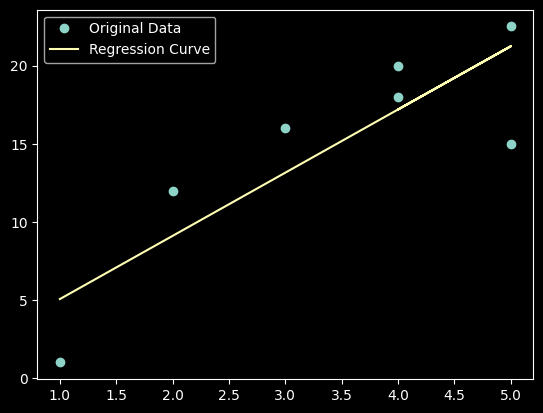

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data
xs = np.array([1, 2, 3, 4, 5, 4, 5])
ys = np.array([1, 12, 16, 18, 22.5, 20, 15])

# hyperparameters
learning_rate = 0.01
epochs = 100 

# starting values
b = 0
m = 0.5

# variables
y_regression = []
column_names = ['b', 'm', 'MSE', 'dMSE_db', 'dMSE_dm']
liste = []

# functions
def linear_function(x, m, b):
    return m * x + b

for k in range(epochs):
    y_pred = linear_function(xs, m, b)
    MSE = np.mean((y_pred - ys)**2)
    dMSE_db = -2 * np.mean(ys - y_pred)
    dMSE_dm = -2 * np.mean(xs * (ys - y_pred))

    new_row = [b, m, MSE, dMSE_db, dMSE_dm]
    liste.append(new_row)

    b = b - learning_rate * dMSE_db
    m = m - learning_rate * dMSE_dm

df = pd.DataFrame(liste, columns=column_names)
print(df)

# plot
plt.style.use('dark_background')
colors = sns.light_palette('seagreen', 3)
plt.plot(xs, ys, 'o', label="Original Data")
y_regression = linear_function(xs, m, b)
plt.plot(xs, y_regression, label="Regression Curve")
plt.legend()
plt.show()

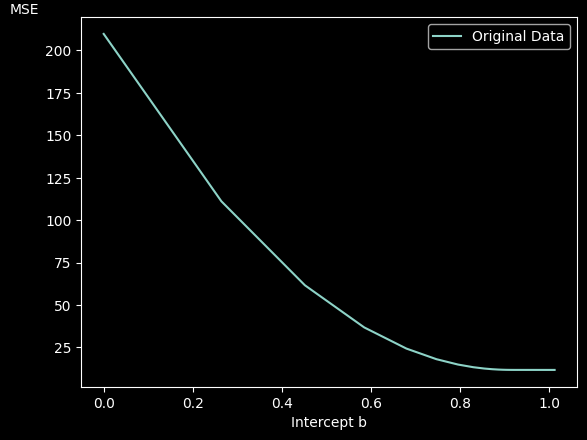

In [2]:
### PLOTTEN ### 

plt.plot(list(df['b']), list(df['MSE']) , label="Original Data")
plt.xlabel('Intercept b', loc='center')
plt.ylabel('MSE', rotation=0, loc='top') 
plt.legend() 
plt.show()

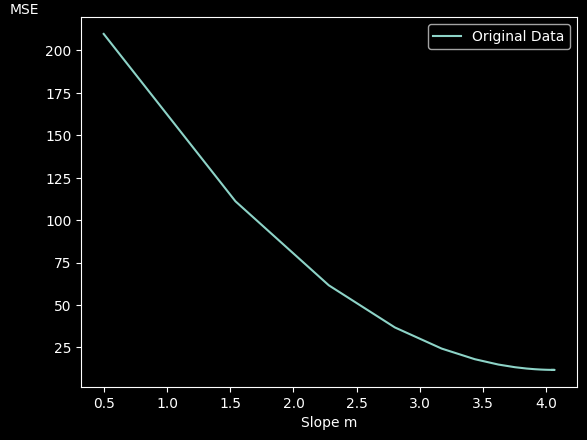

In [3]:
plt.plot(list(df['m']), list(df['MSE']), label="Original Data")
plt.legend() 
plt.xlabel('Slope m', loc='center')
plt.ylabel('MSE', rotation=0, loc='top')
plt.show()